# Bike Sharing Demand: Forecast Use of City Bikeshare System

### < Project Description >
Bike sharing demand prediction has been a classic prediction modelling task for aspiring data analysts and data scientists since its introduction on Kaggle a few years ago. Although it has been referenced and challenged by many students and data analysts, it is still worth doing it as they are able to learn about machine learning prediction and deal with essential aspects for data analysis and modelling such as preprocessing data, feature engineering, evaluating model performance, and etc.

To briefly give background on the bikeshare service, Capital Bikeshare is a bike rental programe in Washington D.C. by which you can borrow and return a bicycle at network kiosks placed accross the city. Your time and location of departure and arrival, duration time is recorded in the system.

- Mission: You are asked to combine historical bike use data and weather information and predict rental demand in the city of Washing D.C. The demand is caculated in terms of counts of bikes rented. Save the result in the sampleSubmission.csv file.

### < Datasets >
- test.csv
- train.csv
- sampleSubmission.csv

### < Data Fields >
- datetime: hourly date + timestamp
- season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday: whether the day is considered a holiday
- workingday: whether the day is neither a weekend nor holiday
- weather: 1 = clear, few clouds, partly cloudy / 2 = mist + couldy, mist + broken clouds, mist + few clouds, mist / 3 = light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds / 4 = heavy rain + ice pallets + thunderstorm + mist / snow + fog
- temp: temperature in Celsius
- atemp: "feels like" temperature in Celsius
- humidity: relative humidity
- windspeed: wind speed
- casual: number of non-registered user rentals initiated
- registered: number of registered user rentals initiated
- count: number of total rentals


### < Model Deployment > 
- Target: rental demand (= count)
- Features: year, month, day, hour, weekday, holiday, workingday, season, holiday, weather, temp, atemp, windspeed, humidity
- Train and Test Split: Train : Validation = 30:70 (the test dataset is provided separately)
- Used Models: non-tree based (Linear regression, Lasso, Ridge), tree-based (Random forest, GBM, XGBoost, LightGBM) We'll be using all these two different type groups of model and compare their performances and choose the least RMSLE performer for submission.


### < Model Evaluation >
Submission is evaludated on the Root Mean Squared Logarithmic Error(RMSLE). The formula is as follows:
<div>
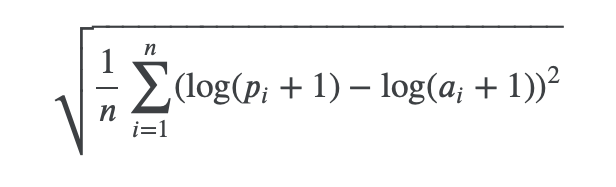
</div>

### < Table of Contents >
1. Libraries
2. Import Datasets
3. Exploratory Data Analysis
4. Feature Engineering
5. Selecting Model
6. Prediction and Submission

#### Reference: 
- https://www.kaggle.com/c/bike-sharing-demand/
- https://didu-story.tistory.com/43?category=937100
- https://www.kaggle.com/code/dogdriip/bike-sharing-demand

## 1. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy

In [2]:
# Set the Korean font as Nanum Gothic
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [3]:
%matplotlib inline

## 2. Import Datasets

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [9]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## 3. Exploratory Data Analysis

In [10]:
# The default datetime is object. Change it to datetime.
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
# Also, change the datetime datetype in test data.
test['datetime'] = pd.to_datetime(test['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [12]:
# Split datetime into year, month, day, hour, weekday.
# Later, we'll look into the relationships between these time elements and bike rental counts by plotting out
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [13]:
# Split datetime in test data as well.
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


## 3.1 Bike Demand  by Feature Visualisation

We're going to look at every data field and its relationship with count (= the number of bike rentals) by plotting it out. This will help to determine features that are taken account of for a prediction model.

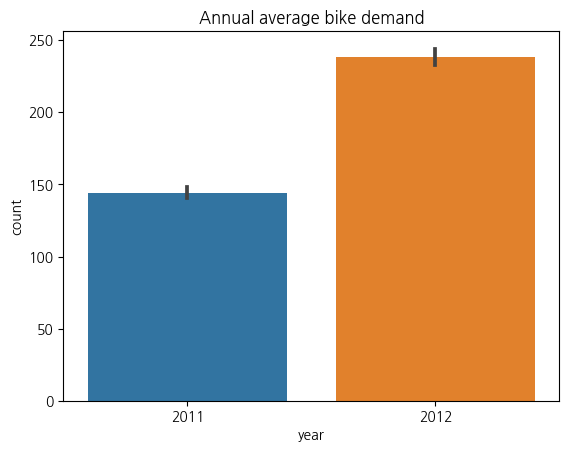

In [14]:
sns.barplot(x='year', y='count', data=train)
plt.title('Annual average bike demand')
plt.show()

In the year of 2012, the number of bike rentals went up dramatically.

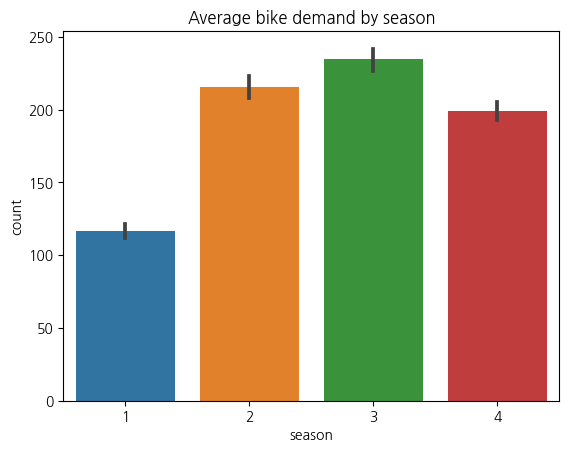

In [15]:
sns.barplot(x='season', y='count', data=train)
plt.title('Average bike demand by season')
plt.show()

When the season is fall(3), the bike retal counts peak, while in spring(1), they hit the lowest retal count. However, this seems odd as spring is much lower than winter(4), which is expected to be vice versa. This has to be explained.

In [16]:
# Find out which months are included for each season
print(train[train['season']==1].month.unique())
print(train[train['season']==2].month.unique())
print(train[train['season']==3].month.unique())
print(train[train['season']==4].month.unique())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]


As we speculated, season 1 includes January, February, and March, which are the coolest time of a year. Therefore, season 1 had the lowest bike demand.

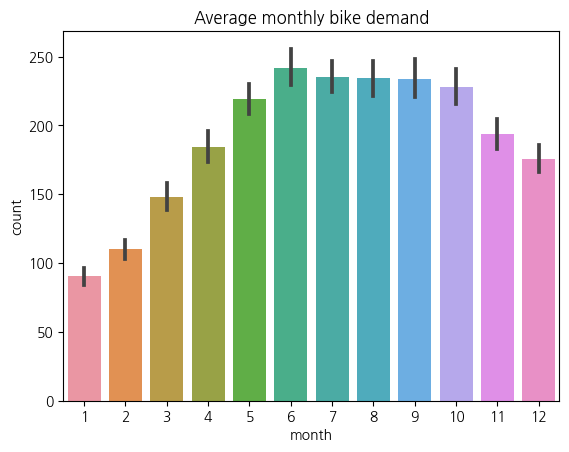

In [17]:
sns.barplot(x='month', y='count', data=train)
plt.title('Average monthly bike demand')
plt.show()

There is a clear and distinct pattern in the average monthly bike demand. As expected, in general in cold months(1, 2, 11 ,12), the number of bike rentals are low, while it is high in warn or hot months (3 to 10).

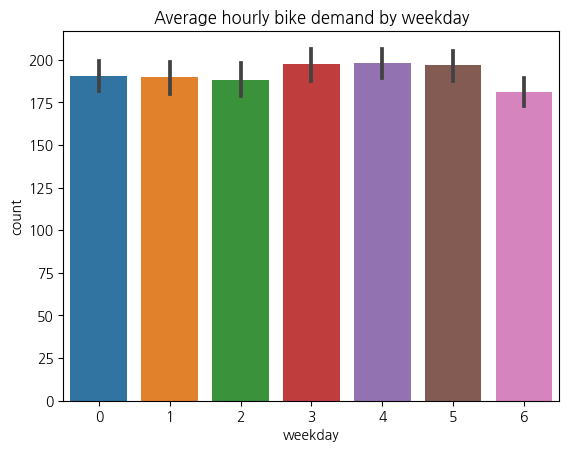

In [18]:
sns.barplot(x='weekday', y='count', data=train)
plt.title('Average hourly bike demand by weekday')
plt.show()

There is a pattern in the weeday bike demand, as well. The number of bike rentals remains the same from Monday(0) to Wendsday(2). However, it increases and levels off on Thursday(3) to Saturday(5). On Sunday, it decreases and bottoms out, hitting the least bike rentals among weekdays.

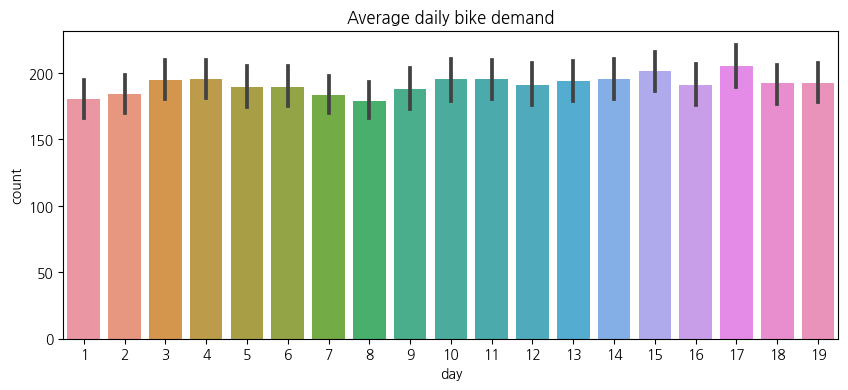

In [19]:
f2 = plt.figure(figsize=(10, 4))
sns.barplot(x=train['day'], y=train['count'])
plt.title('Average daily bike demand')
plt.show()

Given the plot, it is hard to say there is a pattern in the daily bike demand on average.

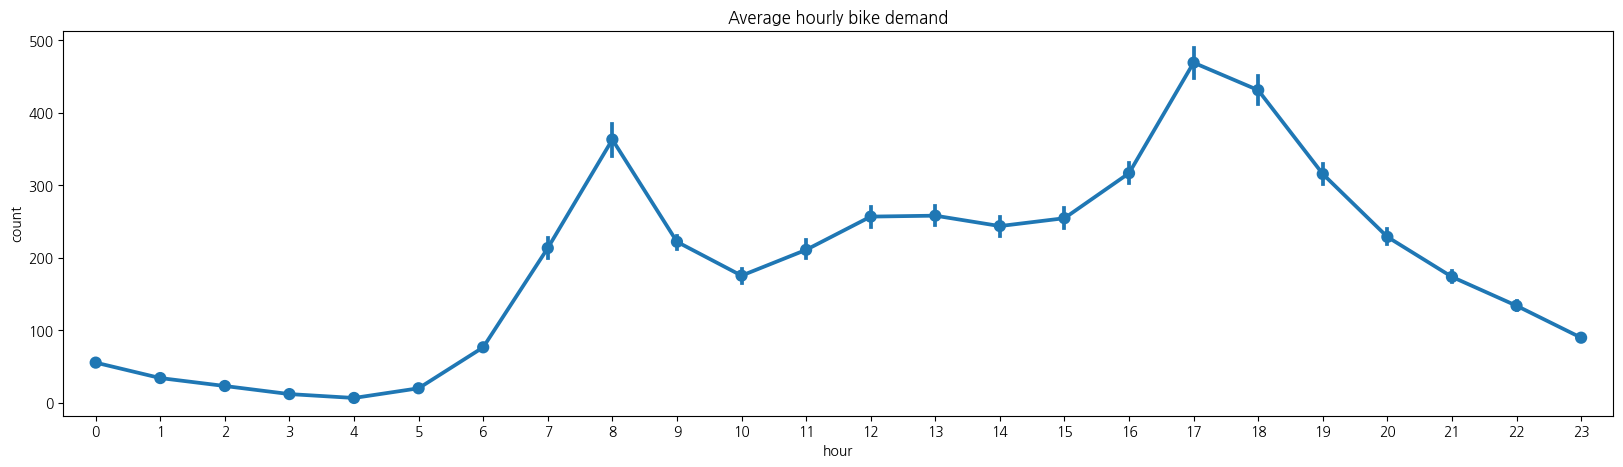

In [20]:
f1 = plt.figure(figsize=(20, 5))
sns.pointplot(x='hour', y='count', data=train)
plt.title('Average hourly bike demand')
plt.show()

There is a clear pattern. The number of bike rentals begin to increase after the lowest point of bike rental in the early morning. And it peaks twice during morning and evening rush hour before it declines in the evening.

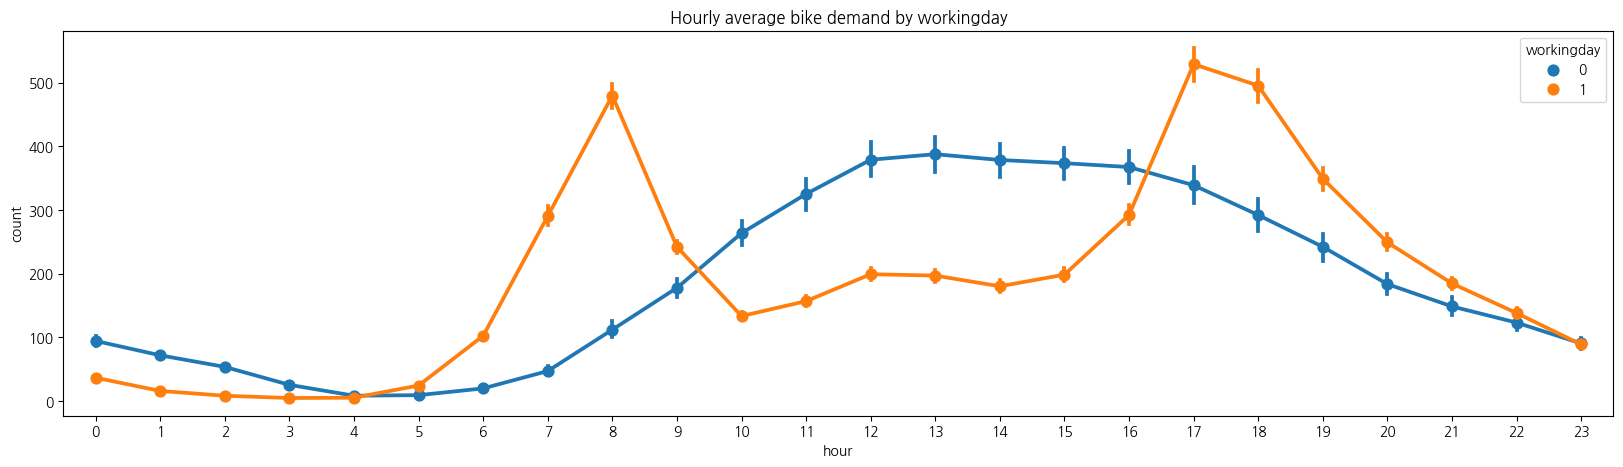

In [21]:
plt.figure(figsize=(20,5))
sns.pointplot(x='hour', y='count', data=train, hue='workingday')
plt.title('Hourly average bike demand by workingday')
plt.show()

Comparing hourldy bike demand between workingday(1) and non-workingday(0), although it tends to increase in the morning and decrease in the evening regardless of working day, workingday has two distinctive peak times unlike non-workingday.

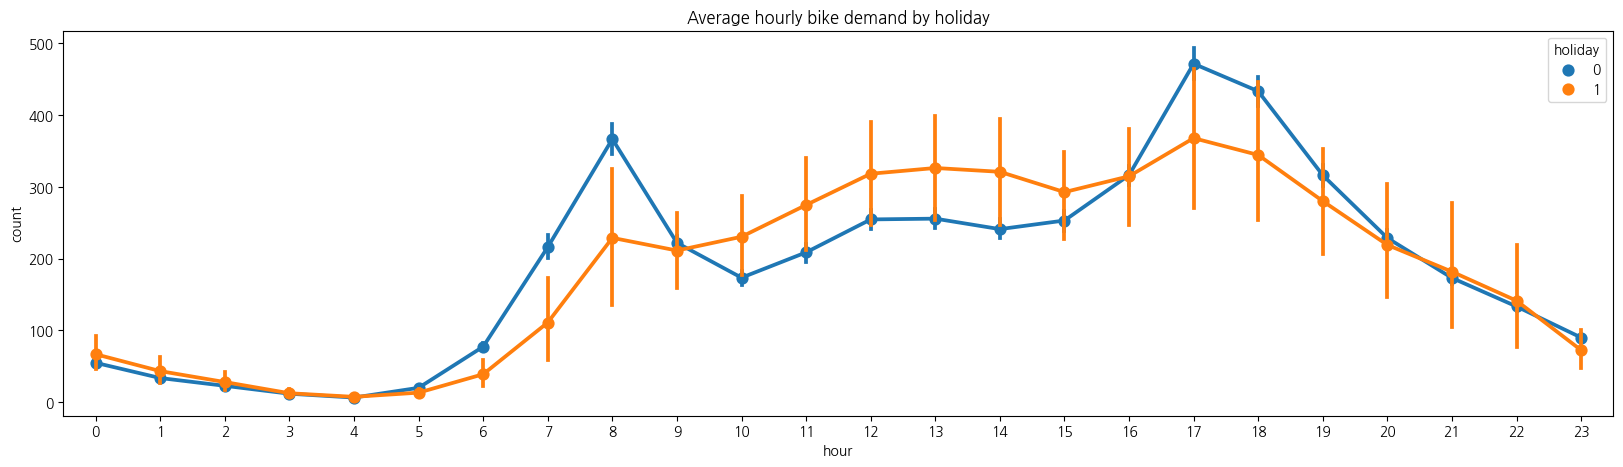

In [22]:
plt.figure(figsize=(20,5))
sns.pointplot(x='hour', y='count', data=train, hue='holiday')
plt.title('Average hourly bike demand by holiday')
plt.show()

This hourly demand plot by holiday(1) and non-holiday(0) is quite similar to hourly demand by workingday.

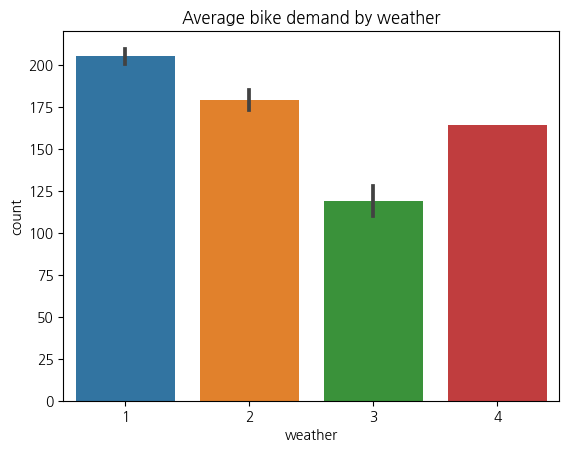

In [23]:
sns.barplot(x='weather', y='count', data=train)
plt.title('Average bike demand by weather')
plt.show()

When weather is good (1, 2), bike demand is high understandably. However, in the worst weather (4), demand is not lowest, but higher wether 3. This can be looked into if more data is provided.

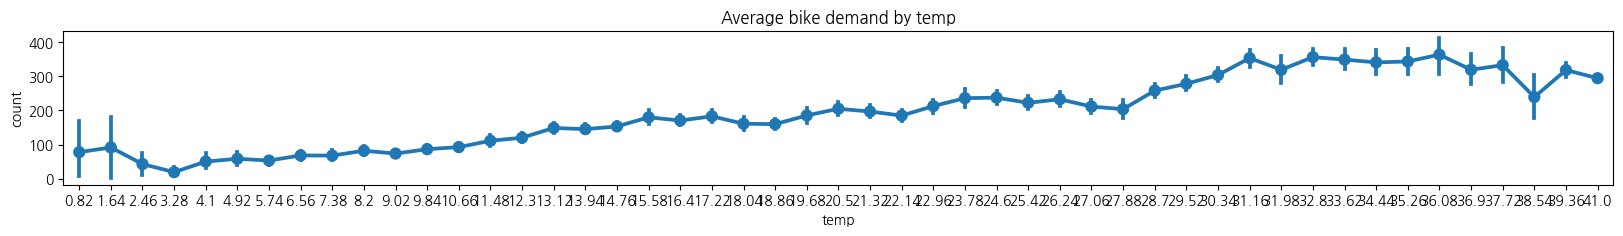

In [24]:
plt.figure(figsize=(20,2))
sns.pointplot(x='temp', y='count', data=train)
plt.title('Average bike demand by temp')
plt.show()

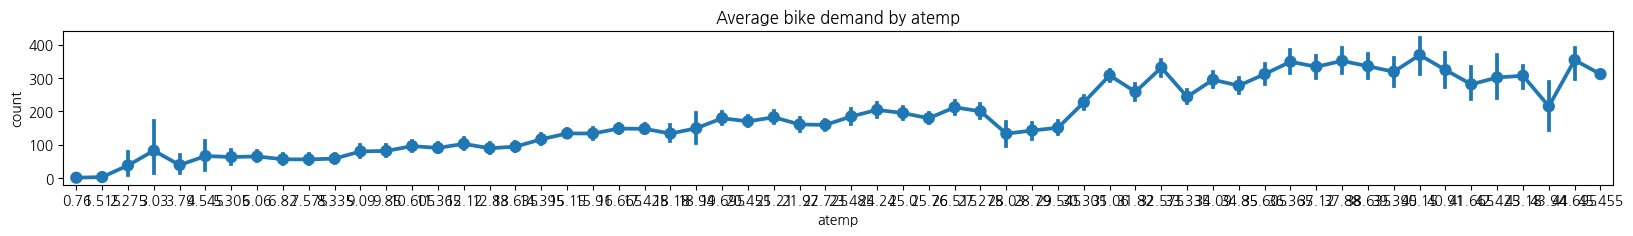

In [25]:
plt.figure(figsize=(20,2))
sns.pointplot(x='atemp', y='count', data=train)
plt.title('Average bike demand by atemp')
plt.show()

In both the demand by temp and atemp, it seems that as temperature goes up, demand goes up, too.

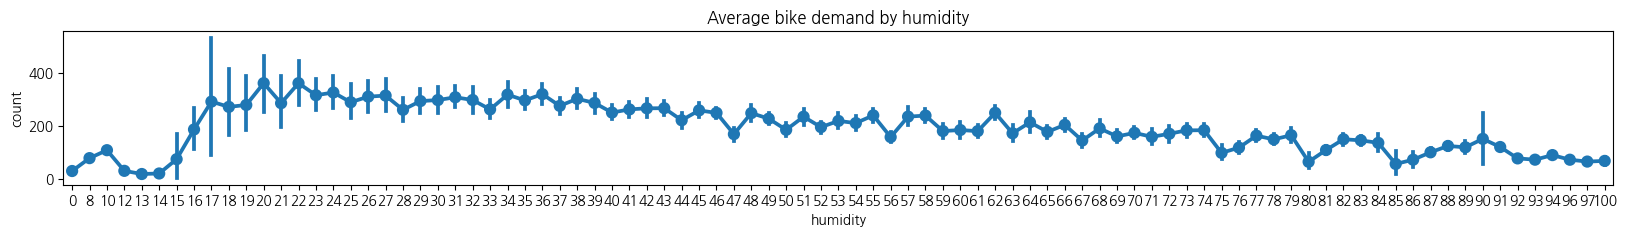

In [26]:
plt.figure(figsize=(20,2))
sns.pointplot(x='humidity', y='count', data=train)
plt.title('Average bike demand by humidity')
plt.show()

Bike demand rises until a certain level of humidity and after that as humidity goes up, demand gradually falls 

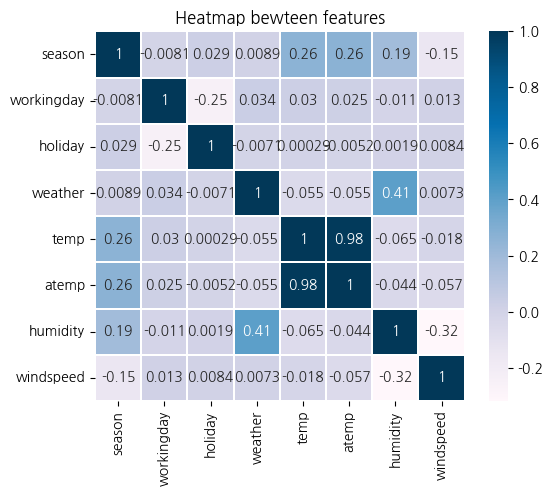

In [27]:
corr_data = train[['datetime', 'season', 'workingday', 'holiday', 'weather', 'temp',
              'atemp', 'humidity', 'windspeed']]
sns.heatmap(corr_data.corr(), cmap=plt.cm.PuBu, linewidth=0.1,
            annot=True, square=True)
plt.title('Heatmap bewteen features')
plt.show()

As temp and atemp are highly correlated (correlation = 0.98) and can have a multicollinearity problem, we'll be removing atemp and only using temp for a prediction model.

temp와 atemp의 상관관계가 매우 높아 다중공선성이 의심, temp 변수 하나만 사용할 것이다.

More to explore about multicollinearity:
- Korean-written: https://velog.io/@jkl133/다중공선성과-MLDL-problems
- English-written: https://medium.com/future-vision/collinearity-what-it-means-why-its-bad-and-how-does-it-affect-other-models-94e1db984168

In [28]:
# Remove the atemp column
train.drop('atemp', axis=1, inplace=True)
test.drop('atemp', axis=1, inplace=True)

We'll continue exploring a variable an count relationship. And the last variable is windspeed.

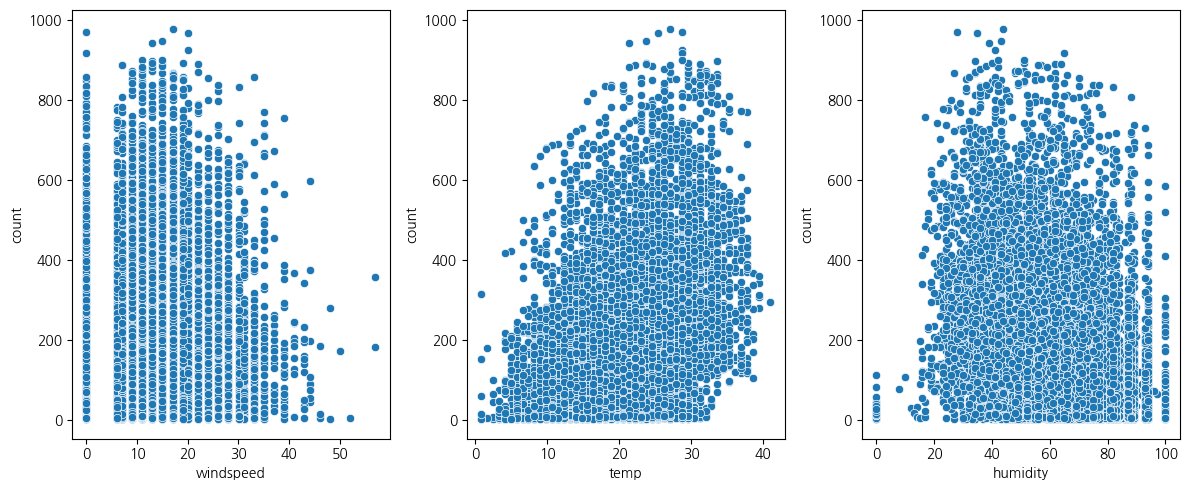

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(131)
sns.scatterplot(x='windspeed', y='count', data=train)

plt.subplot(132)
sns.scatterplot(x='temp', y='count', data=train)

plt.subplot(133)
sns.scatterplot(x='humidity', y='count', data=train)

plt.tight_layout()
plt.show()

In [30]:
len(train[train.windspeed == 0])

1313

There are 1313 rows that have 0 windspeed, which does not make sense and should be corrected to have non-zero windspeed. And This correcting or projecting windspeed will be done later in this kennel.

## 4. Feature Engineering

Here in feature engieering, we'll be removing outliers by the method of IQR and predicting where windspeed is zero. Also, we'll be looking into skewness and kurtosis of the count column to have it normalised.

### 4.1 Removing outliers

First of all, examine continuous variables with box plots.

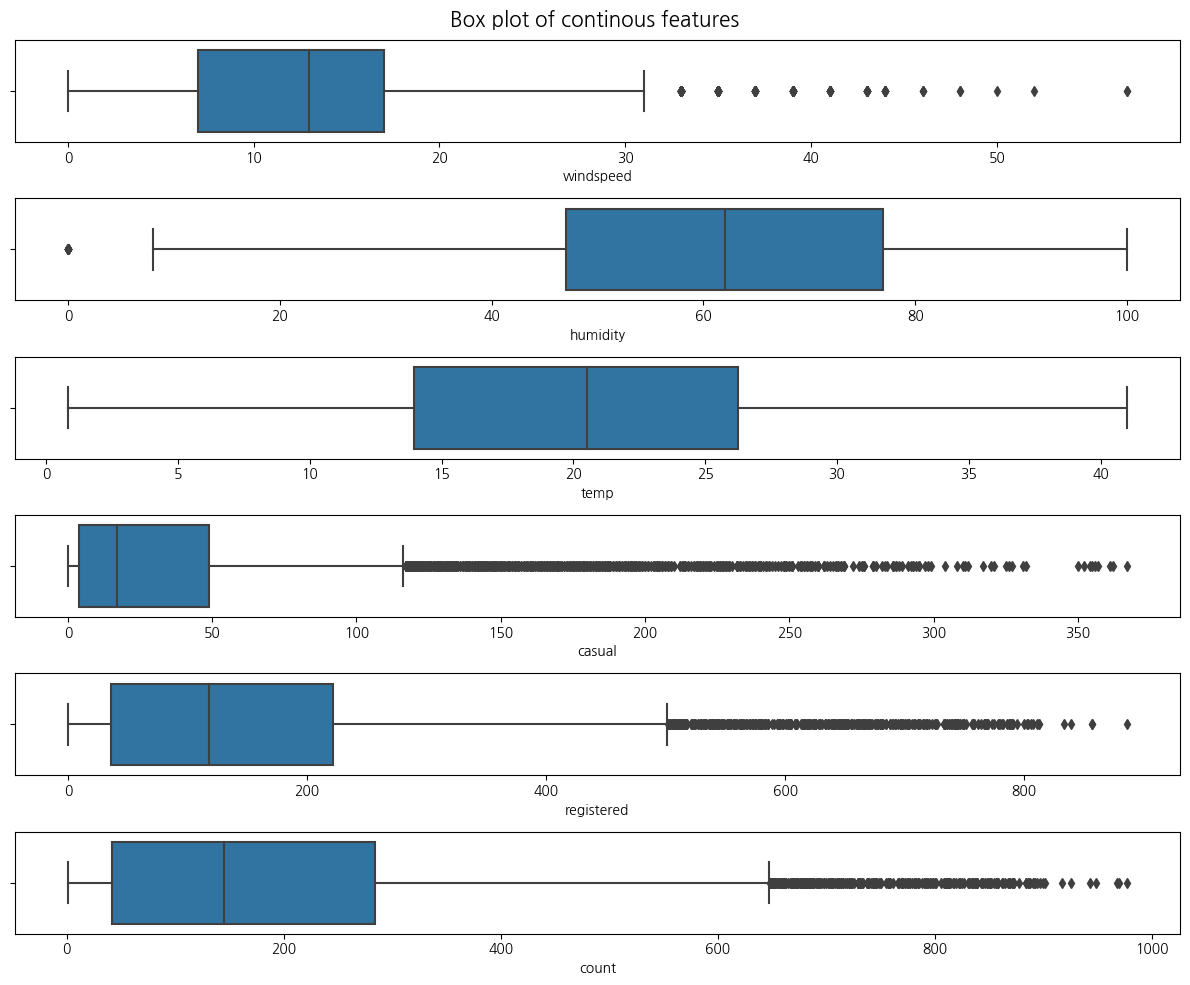

In [31]:
plt.figure(figsize=(12,10))

plt.subplot(611)
sns.boxplot(x='windspeed', data=train)

plt.subplot(612)
sns.boxplot(x='humidity', data=train)

plt.subplot(613)
sns.boxplot(x='temp', data=train)

plt.subplot(614)
sns.boxplot(x='casual', data=train)

plt.subplot(615)
sns.boxplot(x='registered', data=train)

plt.subplot(616)
sns.boxplot(x='count', data=train)

plt.suptitle('Box plot of continous features', size=15, weight=3)
plt.tight_layout()
plt.show()

In [32]:
# The IQR method is applied.
features1 = ['windspeed', 'humidity', 'temp', 'casual', 'registered', 'count']

for i in features1:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    train = train[train[i] < Q3 + 1.5 * IQR]
    train = train[train[i] > Q1 - 1.5 * IQR]
    train = train.reset_index(drop=True)
    
train

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,2012,12,19,19,2
9360,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,2012,12,19,20,2
9361,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,2012,12,19,21,2
9362,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129,2012,12,19,22,2


In [33]:
train.shape

(9364, 16)

### 4.2 Dealing with Windspeed = 0

In [34]:
# We're going to use RandomForest to replace zero windspeed.
import sklearn

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data[data['windspeed'] == 0]
    windnot0 = data[data['windspeed'] != 0]
    
    # As windspeed is a weather variable, we'll use the other weather variables to predict windspeed
    col = ['season', 'day', 'weather', 'temp', 'humidity']
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')
    
    rf = RandomForestClassifier()
    # Filter where windspeed is not 0 and fit the model to it.
    rf.fit(windnot0[col], windnot0['windspeed'])
    
    
    # Predict for 0 windspeed
    pred_wind0 = rf.predict(X=wind0[col])
    
    # Change 0 windspeed to pred_win
    wind0['windspeed'] = pred_wind0
    
    
    # Combine windnot0 and wind0 and put it in the same column
    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

train = predict_windspeed(train)
test = predict_windspeed(test)

/var/folders/_n/d87898yn05g63lkk2gtbrwpw0000gn/T/ipykernel_4075/3972840288.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windnot0['windspeed'] = windnot0['windspeed'].astype('str')
/var/folders/_n/d87898yn05g63lkk2gtbrwpw0000gn/T/ipykernel_4075/3972840288.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind0['windspeed'] = pred_wind0
/var/folders/_n/d87898yn05g63lkk2gtbrwpw0000gn/T/ipykernel_4075/3972840288.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [35]:
len(train[train['windspeed'] == 0])

0

After deploying RandomForest, we no longer have 0 winspeed now.

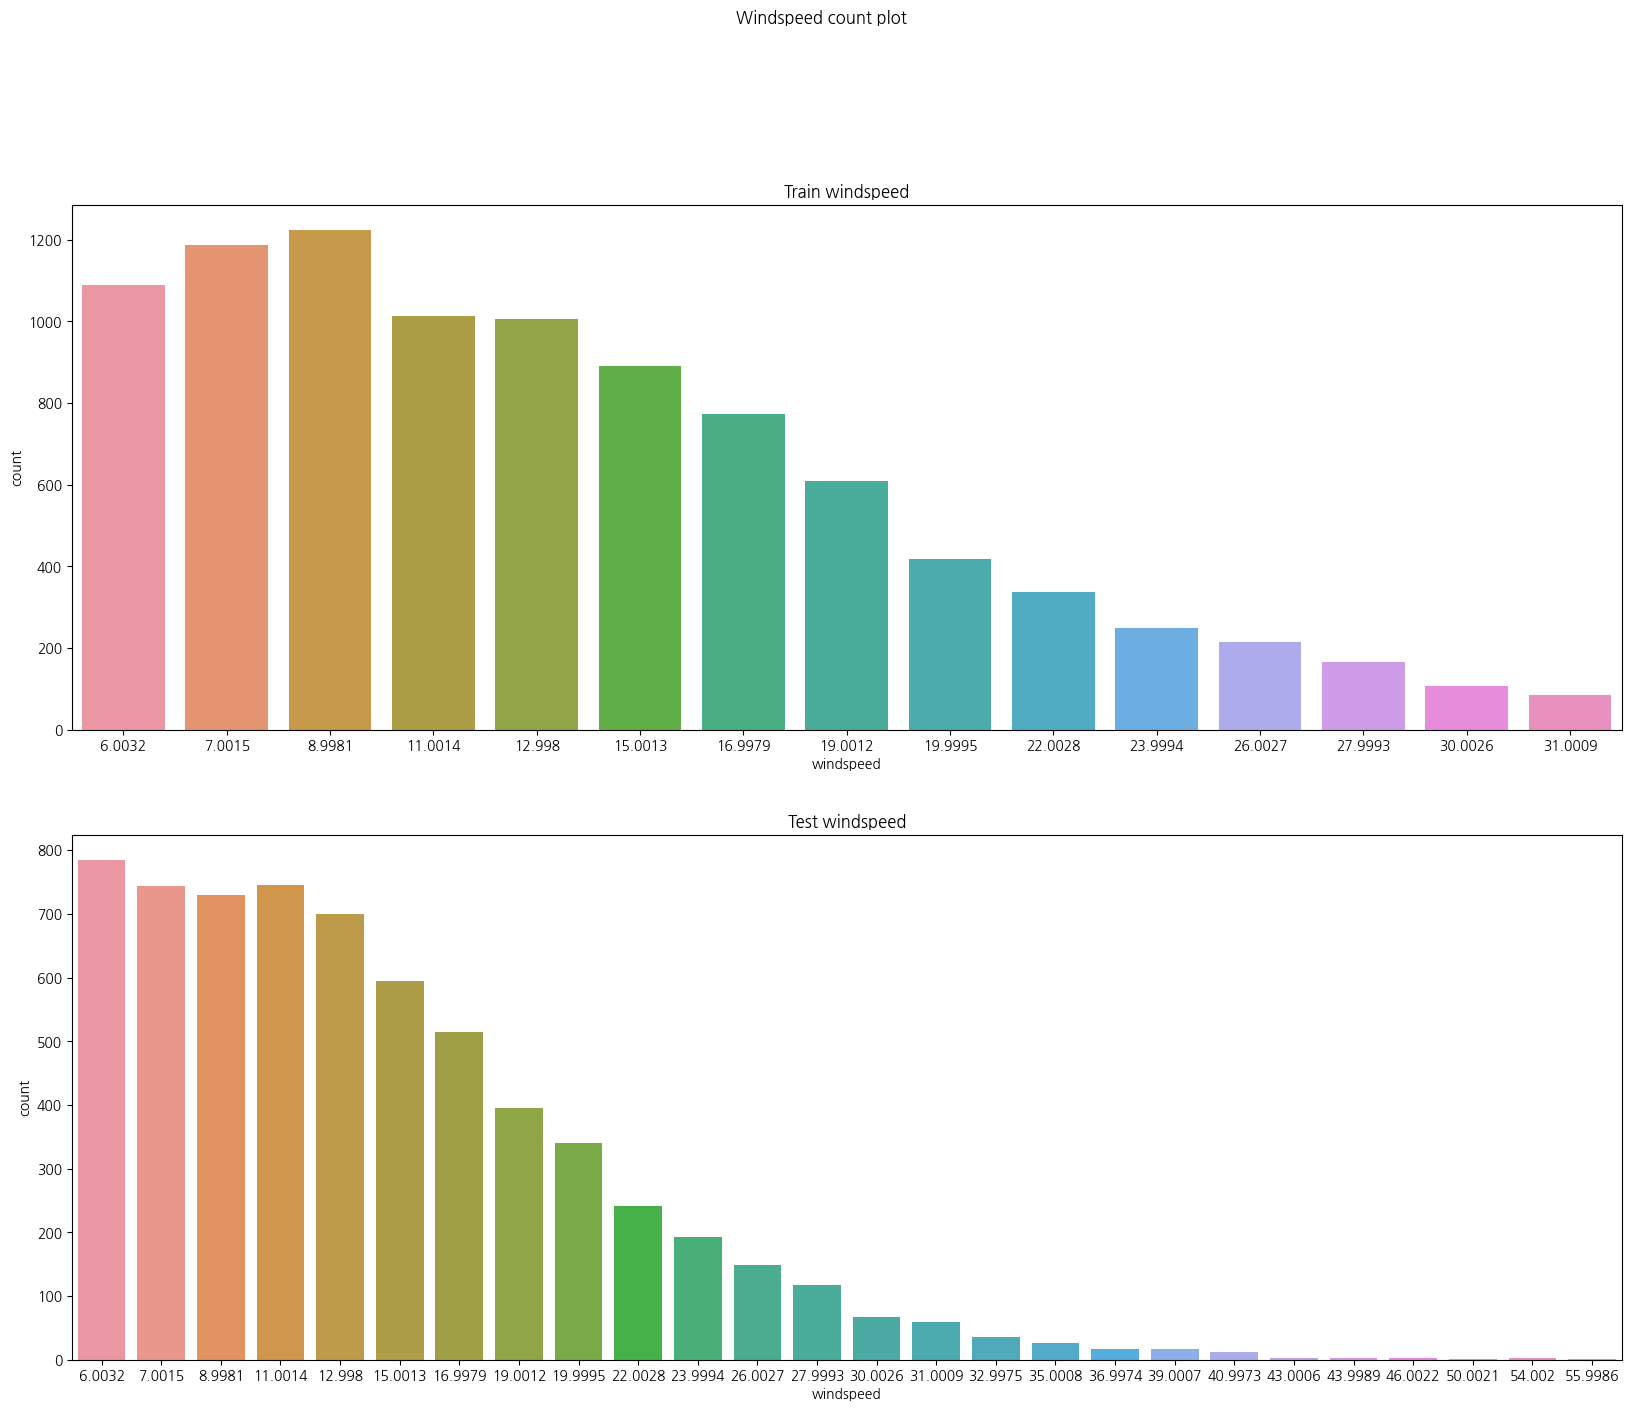

In [36]:
# Plot windspeed with countplot for train and test data
plt.figure(figsize=(20,15))

plt.subplot(211)
sns.countplot(x='windspeed', data=train)
plt.title('Train windspeed')

plt.subplot(212)
sns.countplot(x='windspeed', data=test)
plt.title('Test windspeed')

plt.suptitle('Windspeed count plot', y=1.01)
plt.show()

### 4.3 Skewness & Kurtosis of Bike Rental Counts

<Figure size 1000x600 with 0 Axes>

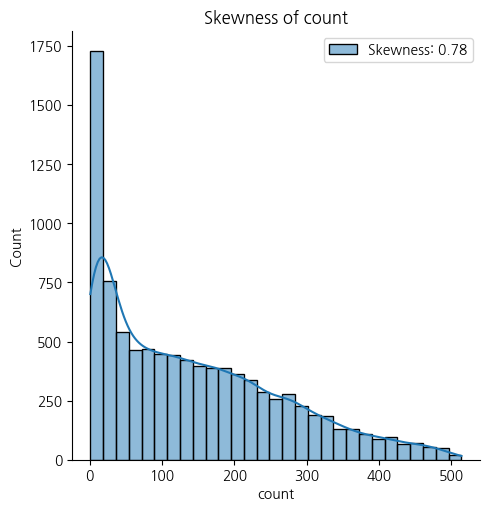

skewness(왜도): 0.78
kurt(첨도): -0.24


In [37]:
# Calculate the skewness and kurtosis of the column of count

plt.figure(figsize=(10, 6))

sns.displot(train['count'], kde=True, label=
             'Skewness: {:.2f}'.format(train['count'].skew()))
plt.title('Skewness of count')
plt.legend(loc=0)
plt.show()
print('skewness(왜도): %.2f' % train['count'].skew())
print('kurt(첨도): %.2f' % train['count'].kurt())

<Figure size 1000x600 with 0 Axes>

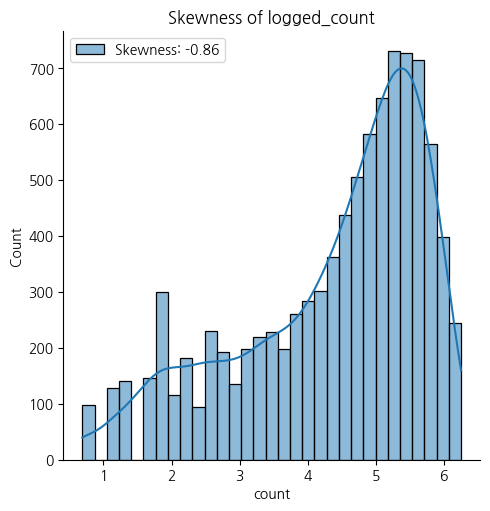

skewness(왜도): -0.86
kurt(첨도): -0.23


In [38]:
# Count is highly rightl-skewed and therefore, we have to get it logged and normaly distributed.
# We should be aware that we'll have to apply exp() function (return an exponential value) to final results as count is logged.
# log1p() will be used as it adds to a logged value and reduce under or overfloating.
# expm1() will be used to restore to a previous scale.

logged_count = np.log1p(train['count'])

plt.figure(figsize=(10, 6))

sns.displot(logged_count, kde=True, label=
             'Skewness: {:.2f}'.format(logged_count.skew()))
plt.title('Skewness of logged_count')
plt.legend(loc=0)
plt.show()
print('skewness(왜도): %.2f' % logged_count.skew())
print('kurt(첨도): %.2f' % logged_count.kurt())

Although it isn't still normally distributed, the skewness has improved a lot.

In [39]:
# Log the count column
train['count'] = np.log1p(train['count'])
train.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 05:00:00,1,0,0,2,9.84,75,6.0032,0,1,0.693147,2011,1,1,5,5
1,2011-01-01 10:00:00,1,0,0,1,15.58,76,16.9979,12,24,3.610918,2011,1,1,10,5
2,2011-01-01 11:00:00,1,0,0,1,14.76,81,19.0012,26,30,4.043051,2011,1,1,11,5
3,2011-01-01 12:00:00,1,0,0,1,17.22,77,19.0012,29,55,4.442651,2011,1,1,12,5
4,2011-01-01 13:00:00,1,0,0,2,18.86,72,19.9995,47,47,4.553877,2011,1,1,13,5


Delete the column of datetime as we have year, month day, and hour columns originated from datetime. And delete the casual and registered columns which add up to count (casual+registered=count). Otherwise, due to their high correlation, it could hurt the interpretability of a model.

In [40]:
train = train.drop(['datetime', 'casual', 'registered'], axis=1)
test = test.drop('datetime', axis=1)

# 5. Selecting a Model

We'll apply a variety of regression models and evaluate their performances. And the evauation method is RMSLE(Root Mean Squared Logarithmic Error). Scikit Learn does not include the RMSLE formula and we're going to create it.

In [41]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

### 5.1 Linear Regression Methods

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['count'], axis=1), train['count'], test_size=0.3)

In [43]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RMSLE:', rmsle(y_test_exp, pred_exp))

RMSLE: 0.9873260107189762


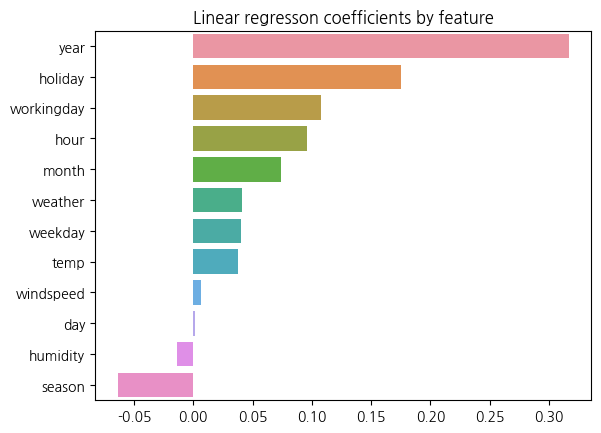

In [44]:
# Visualise coefficients of the linear regression.

coef= pd.Series(lr_reg.coef_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=coef.values, y=coef.index)
plt.title('Linear regresson coefficients by feature')
plt.show()

year is much greater than the other coefficients. This is not understandable as year consists of 2011 and 2012, which determine mostly bike rentals. It seems they have a major influence on the model because they are large number themselves. Therefore, we need to use one-hot encodoing and make year categorical.

In [45]:
# Use get_dummies() from Panda and apply it to year, month, day, hour, weekday, season, holiday, workingday, and weather to get one-hot encodings.

train = pd.get_dummies(train, columns=[
    'year', 'month','day','hour','weekday', 'season', 'holiday', 'workingday', 'weather'])
test = pd.get_dummies(test, columns=[
    'year', 'month','day','hour', 'weekday', 'season', 'holiday', 'workingday', 'weather'])

In [46]:
print(train.shape)
print(test.shape)

(9364, 80)
(6493, 72)


One thing to remember is ensure that test data is encoded in the same manner as train data with the align command.
- Reference: https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

In [47]:
train, test = train.align(test, join='left', axis=1)
test = test.drop('count', axis=1)

In [48]:
print(train.shape)
print(test.shape)

(9364, 80)
(6493, 79)


In [49]:
# We'll set test size as 0.3
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['count'], axis=1), train['count'], test_size=0.3)

In [50]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LinearRegression RMSLE:', rmsle(y_test_exp, pred_exp))

LinearRegression RMSLE: 0.5949958694347761


In [51]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
r_pred = ridge_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
r_pred_exp = np.expm1(r_pred)
print('Ridge RMSLE:', rmsle(y_test_exp, r_pred_exp))

Ridge RMSLE: 0.5976408989834084


In [52]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)
l_pred = lasso_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
l_pred_exp = np.expm1(l_pred)
print('Lasso RMSLE:', rmsle(y_test_exp, l_pred_exp))

Lasso RMSLE: 0.648463910757221


One-hot encoded variables led to much better outcomes. We'll visualise the top 25 coefficients as we have an increased number of features due to one-hot encoding. Previoulsy, it was 20 coefficients.

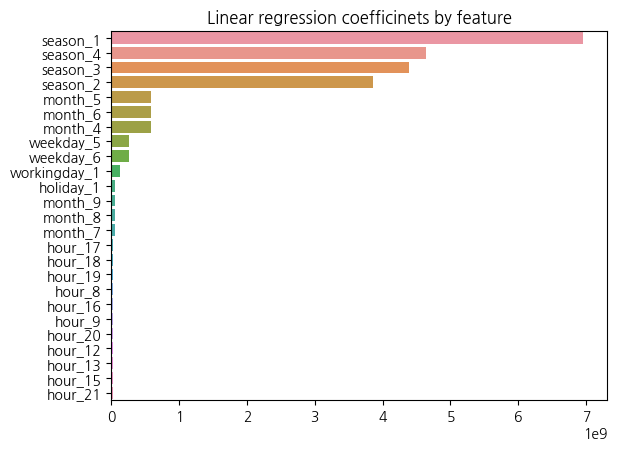

In [53]:
coef = pd.Series(lr_reg.coef_, index=X_train.columns).sort_values(ascending=False)[:25]
sns.barplot(x=coef.values, y=coef.index)
plt.title('Linear regression coefficinets by feature')
plt.show()

### 5.2 Tree Based Methods

In this part, we're going to apply tree-based models and use the logged target(=count) and encoded features like previously done for linear regressions. The models are Random Forest, GBM, XGBoost, and LightGBM.

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [55]:
rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
rf_pred_exp = np.expm1(rf_pred)
print('RandomForestRegressor RMSLE: ', rmsle(y_test_exp, rf_pred_exp))

RandomForestRegressor RMSLE:  0.3428726570311703


In [56]:
gb_reg = GradientBoostingRegressor(n_estimators=500)
gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
gb_pred_exp = np.expm1(gb_pred)
print('GradientBoostingRegressor RMSLE: ', rmsle(y_test_exp, gb_pred_exp))

GradientBoostingRegressor RMSLE:  0.34039942356682396


In [57]:
xgb_reg = XGBRegressor(n_estimators=500)
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
xgb_pred_exp = np.expm1(xgb_pred)
print('XGBRegressor RMSLE: ', rmsle(y_test_exp, xgb_pred_exp))

XGBRegressor RMSLE:  0.32492401835570633


In [58]:
lgbm_reg = LGBMRegressor(n_estimators=500)
lgbm_reg.fit(X_train, y_train)
lgbm_pred = lgbm_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
lgbm_pred_exp = np.expm1(lgbm_pred)
print('LBGMRegressor RMSLE: ', rmsle(y_test_exp, lgbm_pred_exp))

LBGMRegressor RMSLE:  0.30116935594147515


We learned tree-based models outperformed linear regression ones. However, this does not mean tree-based models are always better than linear ones and it is dependant on what datasets are.

## 6. Prediction and Submission

Lastly, we'll choose the best result and apply expm1() function before we save it to sampleSubmission.csv file.

In [59]:
X_train = train.drop('count', axis=1)
y_train = train['count']
X_test = test

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(9364, 79)
(9364,)
(6493, 79)


In [61]:
lgbm_reg = LGBMRegressor(n_estimators=500)
lgbm_reg.fit(X_train, y_train)
lgbm_pred = lgbm_reg.predict(X_test)

pred_exp = np.expm1(lgbm_pred)

In [62]:
submission = pd.read_csv('sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [63]:
submission['count'] = pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,10.123392
1,2011-01-20 01:00:00,2.713559
2,2011-01-20 02:00:00,1.600881
3,2011-01-20 03:00:00,5.843995
4,2011-01-20 04:00:00,38.898276
...,...,...
6488,2012-12-31 19:00:00,120.952894
6489,2012-12-31 20:00:00,118.311377
6490,2012-12-31 21:00:00,214.024309
6491,2012-12-31 22:00:00,67.115460


In [64]:
submission.to_csv('submission', index=False)